<font size="5">Exploratory data analysis (EDA)</font>

### 1. Importing Data

In [1]:
import pandas as pd
data = pd.read_csv('/home/shub/Downloads/nba-players.csv', index_col=0)

#Displaying first 5 rows of data.
data.head(5)

,name,gp,min,pts,fgm,fga,fg,3p_made,3pa,3p,...,fta,ft,oreb,dreb,reb,ast,stl,blk,tov,target_5yrs
0,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,...,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0
1,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,...,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0
2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,...,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0
3,Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,...,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1
4,Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,...,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1


In [2]:
# Displaying number of rows, number of columns.
data.shape

(1340, 21)

In [3]:
# Displaying all column names.
data.columns

Index(['name', 'gp', 'min', 'pts', 'fgm', 'fga', 'fg', '3p_made', '3pa', '3p',
       'ftm', 'fta', 'ft', 'oreb', 'dreb', 'reb', 'ast', 'stl', 'blk', 'tov',
       'target_5yrs'],
      dtype='object')

In [4]:
# Displaying a summary of the DataFrame.
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1340 entries, 0 to 1339
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         1340 non-null   object 
 1   gp           1340 non-null   int64  
 2   min          1340 non-null   float64
 3   pts          1340 non-null   float64
 4   fgm          1340 non-null   float64
 5   fga          1340 non-null   float64
 6   fg           1340 non-null   float64
 7   3p_made      1340 non-null   float64
 8   3pa          1340 non-null   float64
 9   3p           1340 non-null   float64
 10  ftm          1340 non-null   float64
 11  fta          1340 non-null   float64
 12  ft           1340 non-null   float64
 13  oreb         1340 non-null   float64
 14  dreb         1340 non-null   float64
 15  reb          1340 non-null   float64
 16  ast          1340 non-null   float64
 17  stl          1340 non-null   float64
 18  blk          1340 non-null   float64
 19  tov        

### 2. Checking for missing Values if any

In [5]:
data.isna()     #Displaying the number of missing values in each column.
data.isna().sum()  # Aggregating the number of missing values per column.

name           0
gp             0
min            0
pts            0
fgm            0
fga            0
fg             0
3p_made        0
3pa            0
3p             0
ftm            0
fta            0
ft             0
oreb           0
dreb           0
reb            0
ast            0
stl            0
blk            0
tov            0
target_5yrs    0
dtype: int64

All columns in this dataset have 0 missing values.

### 3. Statistical Tests

a) Checking class balance in the target column

b) Displaying percentage (%) of values for each class (1, 0) represented in the target column of this dataset.

In [6]:
data["target_5yrs"].value_counts 
data["target_5yrs"].value_counts(normalize=True)*100   

target_5yrs
1    62.014925
0    37.985075
Name: proportion, dtype: float64

About 62% of the values in the target columm belong to class 1, and about 38% of the values belong to class 0. In other words, about 62% of players represented by this data have an NBA career duration of at least five years, and about 38% do not.The dataset is not perfectly balanced, but an exact 50-50 split is a rare occurance in datasets, and a 62-38 split is not too imbalanced. 

In [7]:
#Feature Engineering - feature Selection
# Selecting the columns to proceed with and saving the DataFrame in new variable `selected_data`.
selected_data = data[["gp", "min", "pts", "fg", "3p", "ft", "reb", "ast", "stl", "blk", "tov", "target_5yrs"]]
selected_data.head()

,gp,min,pts,fg,3p,ft,reb,ast,stl,blk,tov,target_5yrs
0,36,27.4,7.4,34.7,25.0,69.9,4.1,1.9,0.4,0.4,1.3,0
1,35,26.9,7.2,29.6,23.5,76.5,2.4,3.7,1.1,0.5,1.6,0
2,74,15.3,5.2,42.2,24.4,67.0,2.2,1.0,0.5,0.3,1.0,0
3,58,11.6,5.7,42.6,22.6,68.9,1.9,0.8,0.6,0.1,1.0,1
4,48,11.5,4.5,52.4,0.0,67.4,2.5,0.3,0.3,0.4,0.8,1


In [8]:
#Feature Engineering - feature Extraction- Extracting two features that would help predict target_5yrs.
#Creating a new variable named `extracted_data and making a copy of `selected_data` 
extracted_data = selected_data.copy()

# Adding a new column named `total_points`, Calculating total points earned by multiplying the number of games played by the average number of points earned per game
extracted_data["total_points"] = extracted_data["gp"] * extracted_data["pts"]

# Adding a new column named `efficiency`. Calculating efficiency by dividing the total points earned by the total number 
# of minutes played, which yields points per minute. (Note that `min` represents avg. minutes per game.)
extracted_data["efficiency"] = extracted_data["total_points"] / (extracted_data["min"] * extracted_data["gp"])

# Displaing the first few rows of `extracted_data` to confirm that the new columns were added.
extracted_data.head()

,gp,min,pts,fg,3p,ft,reb,ast,stl,blk,tov,target_5yrs,total_points,efficiency
0,36,27.4,7.4,34.7,25.0,69.9,4.1,1.9,0.4,0.4,1.3,0,266.4,0.270073
1,35,26.9,7.2,29.6,23.5,76.5,2.4,3.7,1.1,0.5,1.6,0,252.0,0.267658
2,74,15.3,5.2,42.2,24.4,67.0,2.2,1.0,0.5,0.3,1.0,0,384.8,0.339869
3,58,11.6,5.7,42.6,22.6,68.9,1.9,0.8,0.6,0.1,1.0,1,330.6,0.491379
4,48,11.5,4.5,52.4,0.0,67.4,2.5,0.3,0.3,0.4,0.8,1,216.0,0.391304


In [9]:
# Removing columns from `extracted_data` that are no longer needed. Removing `gp`, `pts`, and `min` from `extracted_data`.
extracted_data = extracted_data.drop(columns=["gp", "pts", "min"])

# Displaying the first few rows of `extracted_data` to ensure that column drops took place.
extracted_data.head()

,fg,3p,ft,reb,ast,stl,blk,tov,target_5yrs,total_points,efficiency
0,34.7,25.0,69.9,4.1,1.9,0.4,0.4,1.3,0,266.4,0.270073
1,29.6,23.5,76.5,2.4,3.7,1.1,0.5,1.6,0,252.0,0.267658
2,42.2,24.4,67.0,2.2,1.0,0.5,0.3,1.0,0,384.8,0.339869
3,42.6,22.6,68.9,1.9,0.8,0.6,0.1,1.0,1,330.6,0.491379
4,52.4,0.0,67.4,2.5,0.3,0.3,0.4,0.8,1,216.0,0.391304


<font size="5">Building a Naive Bayes model</font>

### 1. Importing required packages

In [10]:
# Import relevant libraries and modules.
from sklearn import naive_bayes
from sklearn import model_selection
from sklearn import metrics

### 2. Model Preparation

### Isolating target and predictor variables
Separately defining the target variable (`target_5yrs`) and the features.

In [11]:
# Define the y (target) variable.
y = extracted_data['target_5yrs']

# Define the X (predictor) variables.
X = extracted_data.drop('target_5yrs', axis = 1)

In [12]:
# Displaying the first 5 rows of your target data.
y.head(5)

0    0
1    0
2    0
3    1
4    1
Name: target_5yrs, dtype: int64

Given that the target variable contains both 1 and 0 indicates that it is binary and requires a model suitable for binary classification. 

In [13]:
# Displaying the first 5 rows of your predictor variables.
X.head(5)

,fg,3p,ft,reb,ast,stl,blk,tov,total_points,efficiency
0,34.7,25.0,69.9,4.1,1.9,0.4,0.4,1.3,266.4,0.270073
1,29.6,23.5,76.5,2.4,3.7,1.1,0.5,1.6,252.0,0.267658
2,42.2,24.4,67.0,2.2,1.0,0.5,0.3,1.0,384.8,0.339869
3,42.6,22.6,68.9,1.9,0.8,0.6,0.1,1.0,330.6,0.491379
4,52.4,0.0,67.4,2.5,0.3,0.3,0.4,0.8,216.0,0.391304


The data indicates that all of the predictor variables are continuous numerical values, so it is important that the model selected is suitable for continuous features. 

### Performing a split operation on data

Dividing the data into a training set (75% of data) and test set (25% of data). This is an important step in the process, as it allows you to reserve a part of the data that the model has not observed. This tests how well the model generalizes—or performs—on new data.

In [14]:
# Performing the split operation on the data.
# Assigning the outputs as follows: X_train, X_test, y_train, y_test.
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25, random_state=0)

### Printing the shape of each output 
Printing the shape of each output from the train-test split. This will verify that the split operated as expected.

In [15]:
# Print the shape of X_train.
print(X_train.shape)

# Print the shape of X_test.
print(X_test.shape)

# Print the shape of y_train.
print(y_train.shape)

# Print the shape of y_test.
print(y_test.shape)

(1005, 10)
(335, 10)
(1005,)
(335,)


Each training DataFrame contains 1,005 rows, while each test DataFrame contains 335 rows. Additionally, there are 10 columns in each X DataFrame, with only one column in each y DataFrame. The effect of the train-test split showed an approximately 75% training and 25% test split. 

### 3. Model building

Which Naive Bayes algorithm should we use?

Using the assumption that the features are normally distributed and continuous, the Gaussian Naive Bayes algorithm is most appropriate for our data. While our data may not perfectly adhere to these assumptions, this model will still yield the most usable and accurate results. 

#### Fitting our model to our training data and predicting on our test data

By creating our model, we will be drawing on our feature engineering work by training the classifier on the `X_train` DataFrame. We will use this to predict `target_5yrs` from `y_train`.

We'll start by defining `nb` to be the relevant algorithm from `sklearn`.`naive_bayes`. Then we'll fit our model to our training data. We will use this fitted model to create predictions for our test data.

In [16]:
# Assigning `nb` to be the appropriate implementation of Naive Bayes.
nb = naive_bayes.GaussianNB()

# Fitting the model on our training data.
nb.fit(X_train, y_train)

# Applying our model to predict on our test data. Calling this "y_pred".
y_pred = nb.predict(X_test)

### 4. Results and evaluation

#### Leveraging metrics to evaluate our model's performance

To evaluate the data yielded from our model, we can leverage a series of metrics and evaluation techniques from scikit-learn by examining the actual observed values in the test set relative to our model's prediction. Specifically, print the accuracy score, precision score, recall score, and f1 score associated with our test data and predicted values.

In [17]:
# Print accuracy score.
print('accuracy score:'), print(metrics.accuracy_score(y_test, y_pred))

# Print precision score.
print('precision score:'), print(metrics.precision_score(y_test, y_pred))

# Print recall score.
print('recall score:'), print(metrics.recall_score(y_test, y_pred))

# Print f1 score.
print('f1 score:'), print(metrics.f1_score(y_test, y_pred))

accuracy score:
0.6895522388059702
precision score:
0.8405797101449275
recall score:
0.5858585858585859
f1 score:
0.6904761904761905


(None, None)

The accuracy score for this model is 0.6896, or 69.0% accurate.

##### Precision and recall scores for our model, and what do they mean? Is one of these scores more accurate than the other?
Precision and recall scores are both useful to evaluate the correct predictive capability of a model because they balance the false positives and false negatives inherent in prediction.
The model shows a precision score of 0.8406, suggesting the model is quite good at predicting true positives—meaning the player will play longer than five years—while balancing false positives. The recall score of 0.5859 shows worse performance in predicting true negatives—where the player will not play for five years or more—while balancing false negatives.These two metrics combined can give a better assessment of model performance than accuracy does alone.


The F1 score balances the precision and recall performance to give a combined assessment of how well this model delivers predictions. In this case, the F1 score is 0.6905, which suggests reasonable predictive power in this model.

#### Gain clarity with the confusion matrix

A confusion matrix is a graphic that shows our model's true and false positives and negatives. It helps to create a visual representation of the components feeding into the metrics.

##### Creating a confusion matrix based on our predicted values for the test set.

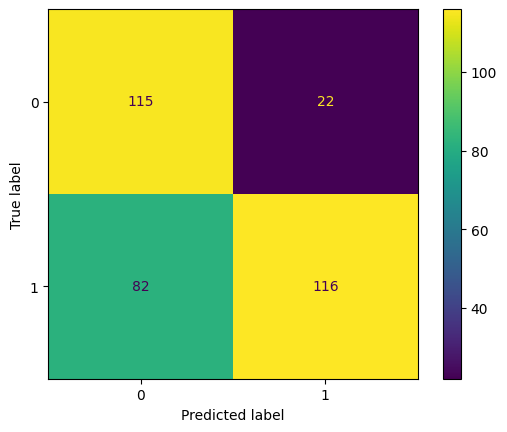

In [18]:
# Constructing and displaying our confusion matrix.

# Constructing the confusion matrix for our predicted and test values.
cm = metrics.confusion_matrix(y_test, y_pred)

# Creating the display for our confusion matrix.
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=nb.classes_)

# Plotting the visual in-line.
disp.plot()

- The top left to bottom right diagonal in the confusion matrix represents the correct predictions, and the ratio of these squares showcases the accuracy.

- The concentration of true positives stands out relative to false positives. This ratio is why the precision score is so high (0.8406).

- True negatives and false negatives are closer in number, which explains the worse recall score.